In [1]:
import py_at_broker as pab
import time
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
b = pab.broker()

### Camera

In [3]:
b.request_signal("realsense_images", pab.MsgType.realsense_image)

True

In [4]:
msg = b.recv_msg("realsense_images")
msg

In [17]:
data = msg.get_rgb()
dim = msg.get_shape_rgb()

im = np.reshape(data, dim)


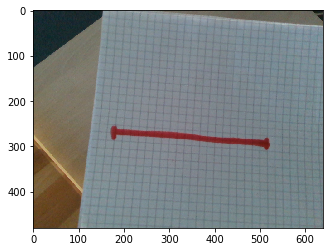

In [18]:
plt.imshow(im)
plt.show()

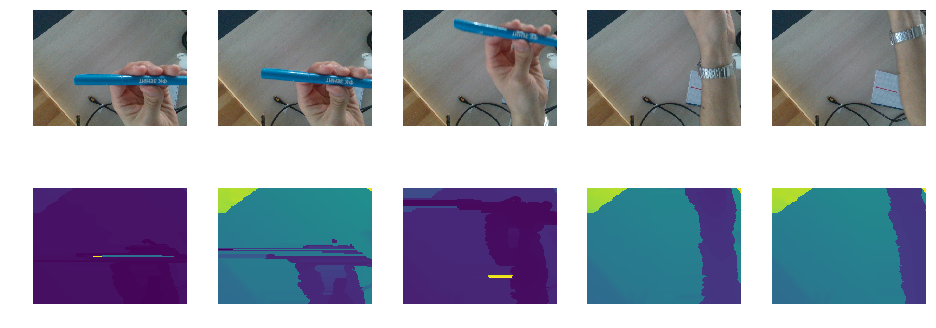

In [28]:
min_depth = []
max_depth = []

RGBs = []
DEPTHs = []

plt.figure(figsize = (16, 6))
for i in range(5): 
    msg = b.recv_msg("realsense_images")
    rgb = msg.get_rgb()
    dim_rgb = msg.get_shape_rgb()
    depth = msg.get_depth()
    dim_depth = msg.get_shape_depth()
    
    min_depth.append(min(depth))
    max_depth.append(max(depth))
    
    im_rgb = np.reshape(rgb, dim_rgb)
    im_depth = np.reshape(depth, dim_depth)
    
    RGBs.append(np.reshape(rgb, dim_rgb))
    DEPTHs.append(np.reshape(depth, dim_depth))
    
    plt.subplot(2, 5, i+1)
    plt.axis('off')
    plt.imshow(im_rgb)
    
    plt.subplot(2, 5, i + 6)
    plt.axis('off')
    plt.imshow(im_depth)
    time.sleep(1)
plt.show()


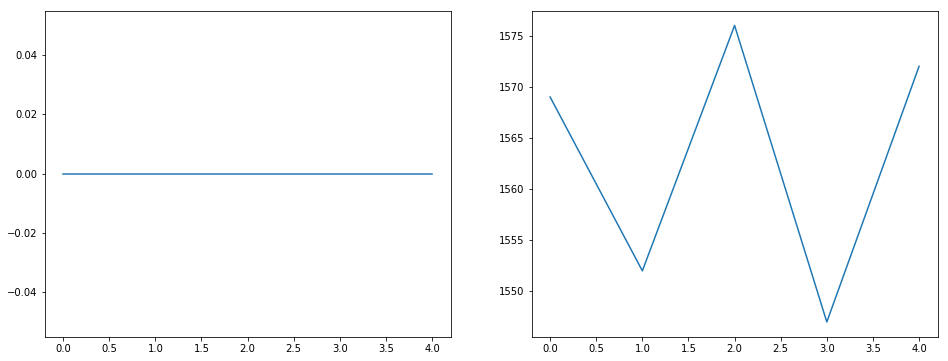

In [9]:
plt.figure(figsize = (16, 6))
plt.subplot(121)
plt.plot(min_depth)
plt.subplot(122)
plt.plot(max_depth)

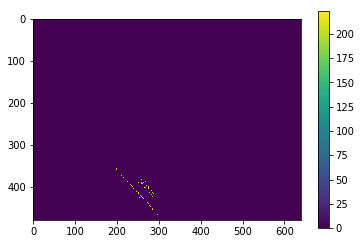

In [59]:
first_red = RGBs[3][:, :, 0] 
test = np.array(first_red)
x, y = np.where(test < 190)
test[x, y] = 0
plt.imshow(test)
plt.colorbar()
plt.show()

In [55]:
x, y = np.where(test < 180)
a = np.array(test)
a[1,2] = 0

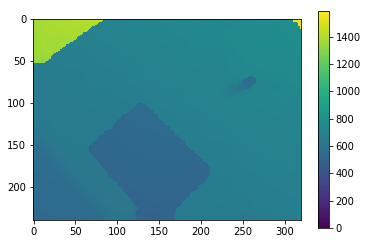

In [17]:
plt.imshow(DEPTHs[3])
plt.colorbar()

### Lider

In [69]:
b.request_signal("franka_lidar", pab.MsgType.franka_lidar)
N = 100
lidar_data = np.zeros((N, 9))
for i in range(N): 
    lidar_msg = b.recv_msg("franka_lidar", 0)
    lid = lidar_msg.get_data()
    lidar_data[i, :] = lid
    time.sleep(0.1)
    


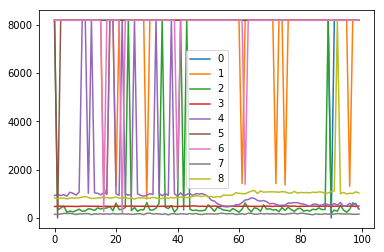

In [70]:
for j in range(9): 
    plt.plot(lidar_data[:, j], label = str(j))
plt.legend()
plt.show()

KeyboardInterrupt: 

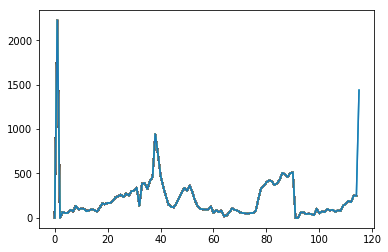

In [76]:
lidar_data=[]
import pylab as pl
from IPython import display

while True:
    lidar_msg = b.recv_msg("franka_lidar", -1)
    lid = lidar_msg.get_data()
    if (lid[0]<3000): 
        lidar_data.append(lid[0])
    plt.plot(lidar_data)
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(0.1)


### State


In [71]:
b.request_signal("franka_state", pab.MsgType.franka_state)
msg = b.recv_msg("franka_state")


Signal franka_state unknown to the global address broker. Was it already registered by a module?


Exception: Signal franka_state is unknown. Is it registered as input?

# Save data


In [29]:
import pickle as p 
p.dump(RGBs, open('rbg_data.p', 'wb'))
p.dump(DEPTHs, open('depth_data.p', 'wb'))

In [30]:
test = p.load(open('rbg_data.p', 'rb'))

In [31]:
test

[array([[[ 38,  59,  76],
         [ 36,  57,  74],
         [ 50,  48,  80],
         ...,
         [ 21,  28,  34],
         [ 10,  20,  46],
         [  9,  19,  45]],
 
        [[ 34,  56,  78],
         [ 29,  51,  73],
         [ 38,  46,  72],
         ...,
         [ 22,  29,  37],
         [ 14,  22,  48],
         [ 15,  23,  49]],
 
        [[ 27,  52,  73],
         [ 24,  49,  70],
         [ 33,  48,  72],
         ...,
         [ 22,  32,  39],
         [ 16,  23,  47],
         [ 15,  22,  46]],
 
        ...,
 
        [[106,  86,  64],
         [106,  86,  64],
         [110,  82,  63],
         ...,
         [103, 114, 110],
         [103, 114, 112],
         [ 97, 108, 106]],
 
        [[107,  85,  61],
         [ 96,  74,  50],
         [110,  86,  63],
         ...,
         [109, 117, 116],
         [ 93, 105, 107],
         [ 95, 107, 109]],
 
        [[110,  86,  59],
         [111,  87,  60],
         [109,  87,  61],
         ...,
         [103, 114, 114],
  